#Библиотеки

In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#Загружаем данные

In [555]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

In [556]:
print(f'train shape - {train_df.shape}', '\n', f'test shape - {test_df.shape}')

train shape - (8693, 14) 
 test shape - (4277, 13)


In [557]:
#Функция для описания датасета

def info_df(df):
  info_df = pd.DataFrame()
  info_df['Columns'] = df.columns
  info_df['Null'] = list(df.isnull().sum())
  info_df['Unique'] = list(df.nunique())
  info_df['Type'] = list(df.dtypes)

  return info_df

## train

In [558]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [559]:
info_df(train_df)

,Columns,Null,Unique,Type
0,PassengerId,0,8693,object
1,HomePlanet,201,3,object
2,CryoSleep,217,2,object
3,Cabin,199,6560,object
4,Destination,182,3,object
5,Age,179,80,float64
6,VIP,203,2,object
7,RoomService,181,1273,float64
8,FoodCourt,183,1507,float64
9,ShoppingMall,208,1115,float64


## test

In [560]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [561]:
info_df(test_df)

,Columns,Null,Unique,Type
0,PassengerId,0,4277,object
1,HomePlanet,87,3,object
2,CryoSleep,93,2,object
3,Cabin,100,3265,object
4,Destination,92,3,object
5,Age,91,79,float64
6,VIP,93,2,object
7,RoomService,82,842,float64
8,FoodCourt,106,902,float64
9,ShoppingMall,98,715,float64


#Анализ признаков

##Transported

Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

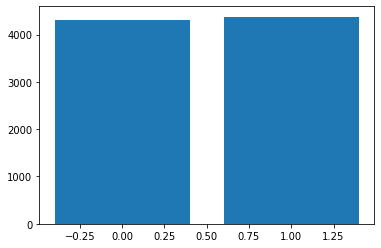

In [562]:
#Посмотрим распределения целевого признака

plt.bar(train_df.groupby('Transported').count().index, train_df.groupby('Transported').count().iloc[:, 0])

plt.show()

In [563]:
train_df.groupby('Transported').count()['PassengerId']

Transported
False    4315
True     4378
Name: PassengerId, dtype: int64

**Вывод**: Соотношение приблизительно 50-50

##HomePlanet

The planet the passenger departed from, typically their planet of permanent residence.

<BarContainer object of 3 artists>

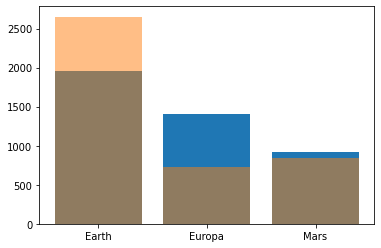

In [564]:
plt.bar(train_df[train_df.Transported == True].groupby('HomePlanet').count().index, train_df[train_df.Transported == True].groupby('HomePlanet').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('HomePlanet').count().index, train_df[train_df.Transported == False].groupby('HomePlanet').count().iloc[:, 0], alpha=.5)

**Вывод**: Больше всего пассажиров село на Earth.

Для людей с Eatrh больше вероятность НЕ перенестись.

Для людей с Europa больше вероятность перенестись.

Для людей с Mars вероятность 50-50.

##CryoSleep

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<BarContainer object of 2 artists>

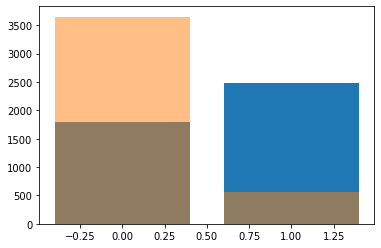

In [565]:
plt.bar(train_df[train_df.Transported == True].groupby('CryoSleep').count().index, train_df[train_df.Transported == True].groupby('CryoSleep').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('CryoSleep').count().index, train_df[train_df.Transported == False].groupby('CryoSleep').count().iloc[:, 0], alpha=.5)

**Вывод**: Большенство людей НЕ находились в CryoSleep

Для людей НЕ находившихся в CryoSleep больше вероятность НЕ перенестись.

Для людей находившихся в CyoSleep больше вероятность перенестить.

##Cabin (need enginering)

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard

Синженерим новые признаки Cabin_deck, Cabin_num, Cabin_side

##Destination

The planet the passenger will be debarking to.

<BarContainer object of 3 artists>

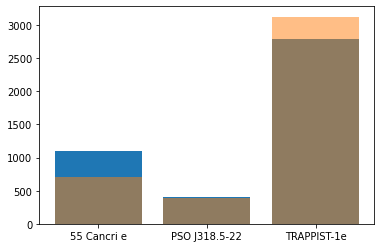

In [566]:
plt.bar(train_df[train_df.Transported == True].groupby('Destination').count().index, train_df[train_df.Transported == True].groupby('Destination').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('Destination').count().index, train_df[train_df.Transported == False].groupby('Destination').count().iloc[:, 0], alpha=.5)

**Вывод**:
Большенство пассажиров летело до TRAPPIST-1e.

Вероятность НЕ перенестись у тех кто летел до TRAPPIST-1e больше.

Вероятность перенестись у тех кто летел до 55 Cancri e больше.

У тех кто летел до PSO вероятность 50-50.

##Age

The age of the passenger.

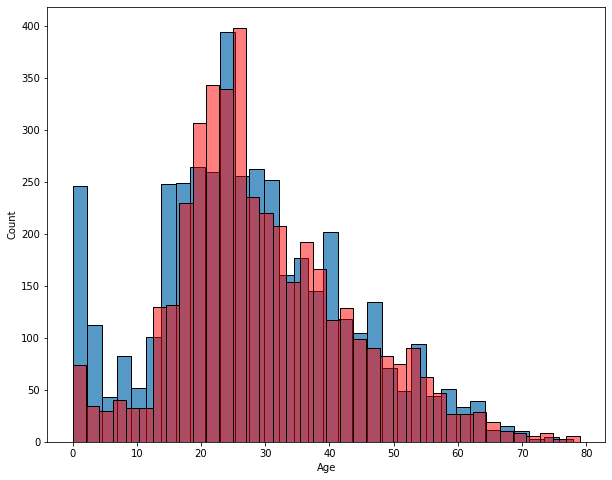

In [567]:
plt.subplots(figsize=(10, 8))

sns.histplot(train_df[train_df.Transported == True]['Age'])
sns.histplot(train_df[train_df.Transported == False]['Age'], color='red', alpha=.5)


plt.show()

**Вывод**:

Вероятность перенестись у детей до 18 лет больше.

Вероятность НЕ перенестись у людей от 18 до 27 лет больше.

После 27 лет вероятность перенестить 50-50

##VIP

Whether the passenger has paid for special VIP service during the voyage.

<BarContainer object of 2 artists>

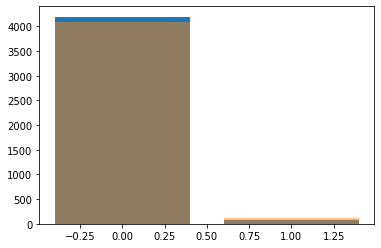

In [568]:
plt.bar(train_df[train_df.Transported == True].groupby('VIP').count().index, train_df[train_df.Transported == True].groupby('VIP').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('VIP').count().index, train_df[train_df.Transported == False].groupby('VIP').count().iloc[:, 0], alpha=.5)

**Вывод**

VIP Персон крайне мало.

Вероятность НЕ перенестись у VIP немного выше.

Вероятность перенестись у НЕ VIP немного выше.


##RoomService, FoodCourt, ShoppingMall, Spa, VRDeck (need enginering)

Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Синженирим новый признак на основе этих просуммуровав значения во всех. Признак покажет сколько денег потратил пассажир на различные сервисы.

#Enginering Features

##Cabin's Feature Engineering

In [569]:
import re

In [570]:
train_df['CabinDeck'] = None
train_df['CabinNum'] = None
train_df['CabinSide'] = None

test_df['CabinDeck'] = None
test_df['CabinNum'] = None
test_df['CabinSide'] = None

In [571]:
#Можно завернуть в функцию
for i in range(train_df.shape[0]):
  try:
    train_df.loc[i, 'CabinDeck'] = train_df.loc[i, 'Cabin'][0]
    train_df.loc[i, 'CabinNum'] = re.findall('\d+', train_df.loc[i, 'Cabin'])[0]
    train_df.loc[i, 'CabinSide'] = train_df.loc[i, 'Cabin'][-1]

  except: 
    train_df.loc[i, 'CabinDeck'] = 'NA'
    train_df.loc[i, 'CabinNum'] = None
    train_df.loc[i, 'CabinSide'] = 'NA'


for i in range(test_df.shape[0]):
  try:
    test_df.loc[i, 'CabinDeck'] = test_df.loc[i, 'Cabin'][0]
    test_df.loc[i, 'CabinNum'] = re.findall('\d+', test_df.loc[i, 'Cabin'])[0]
    test_df.loc[i, 'CabinSide'] = test_df.loc[i, 'Cabin'][-1]

  except: 
    test_df.loc[i, 'CabinDeck'] = 'NA'
    test_df.loc[i, 'CabinNum'] = None
    test_df.loc[i, 'CabinSide'] = 'NA'

###CabinDeck

<BarContainer object of 9 artists>

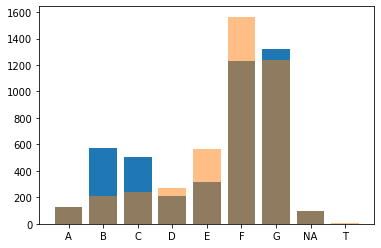

In [572]:
plt.bar(train_df[train_df.Transported == True].groupby('CabinDeck').count().index, train_df[train_df.Transported == True].groupby('CabinDeck').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('CabinDeck').count().index, train_df[train_df.Transported == False].groupby('CabinDeck').count().iloc[:, 0], alpha=.5)

**Вывод**:


У пассажиров с палубы D, E, F вероятность НЕ перенестись больше.

У пассажиров с палубы B, C, G вероятность перенестись больше.

У пассажиров с палубы A вероятность 50-50.

###CabinSide

<BarContainer object of 3 artists>

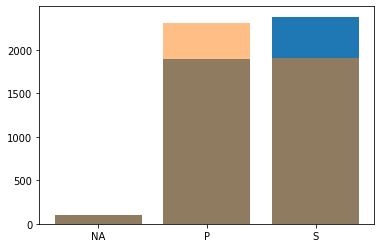

In [573]:
plt.bar(train_df[train_df.Transported == True].groupby('CabinSide').count().index, train_df[train_df.Transported == True].groupby('CabinSide').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('CabinSide').count().index, train_df[train_df.Transported == False].groupby('CabinSide').count().iloc[:, 0], alpha=.5)

**Вывод**:

У пассажиров с размером P вероятность НЕ перенестись больше.

У пассажиров с размером S вероятность перенестись больше.

##Service Feature Engineering

In [574]:
train_df['ServiceBill'] = None
test_df['ServiceBill'] = None

train_df['Service'] = None
test_df['Service'] = None

In [575]:
for i in range(train_df.shape[0]):
  train_df.loc[i, 'ServiceBill'] = train_df.loc[i, 'RoomService']\
                                   + train_df.loc[i, 'FoodCourt']\
                                   + train_df.loc[i, 'ShoppingMall']\
                                   + train_df.loc[i, 'Spa']\
                                   + train_df.loc[i, 'VRDeck']

  if train_df.loc[i, 'ServiceBill'] > 5000:
    train_df.loc[i, 'Service'] = 'B'
  elif train_df.loc[i, 'ServiceBill'] < 1000:
    train_df.loc[i, 'Service'] = 'S'
  else:
    train_df.loc[i, 'Service'] = 'M'




for i in range(test_df.shape[0]):
  test_df.loc[i, 'ServiceBill'] = test_df.loc[i, 'RoomService']\
                                   + test_df.loc[i, 'FoodCourt']\
                                   + test_df.loc[i, 'ShoppingMall']\
                                   + test_df.loc[i, 'Spa']\
                                   + test_df.loc[i, 'VRDeck']

  if test_df.loc[i, 'ServiceBill'] > 5000:
    test_df.loc[i, 'Service'] = 'B'
  elif test_df.loc[i, 'ServiceBill'] < 1000:
    test_df.loc[i, 'Service'] = 'S'
  else:
    test_df.loc[i, 'Service'] = 'M'

Разделим пассажирские траты на большие (> 5000), средние (1000-5000) и незначительные (< 1000)

<BarContainer object of 3 artists>

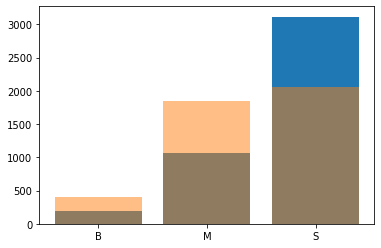

In [576]:
plt.bar(train_df[train_df.Transported == True].groupby('Service').count().index, train_df[train_df.Transported == True].groupby('Service').count().iloc[:, 0])
plt.bar(train_df[train_df.Transported == False].groupby('Service').count().index, train_df[train_df.Transported == False].groupby('Service').count().iloc[:, 0], alpha=.5)

**Вывод**:
У пассажиров со средними (M) и большими (B) тратами вероятность НЕ перестись больше.

У пассажиров с маленькими (S) тратами вероятность перестись больше.

#Обработка пропущенных значений

Необходимо заполнить 

In [577]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna('NA')
train_df['CryoSleep'] = train_df['CryoSleep'].fillna('NA')
train_df.dropna(subset=['Cabin'], inplace=True)
train_df['Destination'] = train_df['Destination'].fillna('NA')
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['VIP'] = train_df['VIP'].fillna('NA')
train_df['ServiceBill'] = train_df['ServiceBill'].fillna(0)
train_df['Name'] = train_df['Name'].fillna('NA')

In [578]:
test_df['HomePlanet'] = test_df['HomePlanet'].fillna('NA')
test_df['CryoSleep'] = test_df['CryoSleep'].fillna('NA')

test_df['Destination'] = test_df['Destination'].fillna('NA')
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['VIP'] = test_df['VIP'].fillna('NA')
test_df['ServiceBill'] = test_df['ServiceBill'].fillna(0)
test_df['Name'] = test_df['Name'].fillna('NA')

#Пост-обработка (удаление ненужных признаков)

In [579]:
train_df.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'CabinNum', 'ServiceBill'], axis=1, inplace=True)

In [580]:
test_df.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'CabinNum', 'ServiceBill'], axis=1, inplace=True)

In [581]:
y = train_df['Transported']
X = train_df.drop(['Transported'], axis=1)

In [582]:
X_test = test_df.copy()

X, y, X_test

#Кодирование признаков

In [583]:
info_df(X)

,Columns,Null,Unique,Type
0,PassengerId,0,8494,object
1,HomePlanet,0,4,object
2,CryoSleep,0,3,object
3,Destination,0,4,object
4,Age,0,81,float64
5,VIP,0,3,object
6,CabinDeck,0,8,object
7,CabinSide,0,2,object
8,Service,0,3,object


In [584]:
from sklearn import preprocessing

In [585]:
X['CabinSide'] = preprocessing.LabelEncoder().fit_transform(X['CabinSide'])
X_test['CabinSide'] = preprocessing.LabelEncoder().fit_transform(X_test['CabinSide'])

In [586]:
X = pd.get_dummies(X, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'Service'])
X_test = pd.get_dummies(X_test, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'Service'])

In [587]:
X_test.drop(['CabinDeck_NA'], axis=1, inplace=True)

#Machine Learning

## Модели

###Всё готово к машинному обучению

In [588]:
#Импорт библиотек

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings

In [589]:
random_state = 7

In [590]:
#Так как датасет несбалансированный, то задаем параметр stratify = целевой признак
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [591]:
#Создадим функцию для нахождения наилучших параметров
def best_params(reg, parametrs, X, y, cv):
  grid = GridSearchCV(reg, parametrs, cv=cv, scoring='roc_auc')
  grid = grid.fit(X, y)
  return grid.best_params_

In [592]:
#Алгоритм kNN
knn_parametrs = {'n_neighbors': range(1, 50)}

#Decision Trees
dtc_parametrs = {'max_depth': range(1, 15), 'min_samples_leaf': range(1, 10)}

#LogisticRegression
lr_parametrs = {'C': np.arange(0.1, 2.0, 0.1)}

#Для кросс-валидации
skf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)

In [593]:
# #Подбираем лучшие параметры
# knn_best_parametrs = best_params(KNeighborsClassifier(), 
#                                  knn_parametrs, x_train, y_train, skf)

# dtc_best_parametrs = best_params(DecisionTreeClassifier(random_state = random_state),
#                                  dtc_parametrs, x_train, y_train, skf)

# lr_best_parametrs = best_params(LogisticRegression(random_state = random_state),
#                                  lr_parametrs, x_train, y_train, skf)

# #Здесь выскакивало предупреждение, я его скрыл
# warnings.filterwarnings('ignore')

In [594]:
# #Посмотрим какие параметры оказались наилучшими
# print('kNN\n', '-'*20, '\n', knn_best_parametrs, '\n')
# print('Decision Trees\n', '-'*20, '\n', dtc_best_parametrs, '\n')
# print('LogisticRegression\n', '-'*20, '\n', lr_best_parametrs, '\n')

###Строим модели (с учетом наилучших параметров)

In [595]:
# #Алгоритм kNN
# knn = KNeighborsClassifier(**knn_best_parametrs)
# knn_model = knn.fit(x_train, y_train)
# knn_pred = knn_model.predict(x_test)

In [596]:
# #Decision Trees
# dtc = DecisionTreeClassifier(**dtc_best_parametrs, random_state=random_state)
# dtc_model = dtc.fit(x_train, y_train)
# dtc_pred = dtc_model.predict(x_test)

In [597]:
# #LogisticRegression
# lr = LogisticRegression(**lr_best_parametrs, random_state=random_state)
# lr_model = lr.fit(x_train, y_train)
# lr_pred = lr_model.predict(x_test)

# #Здесь выскакивало предупреждение, я его скрыл
# warnings.filterwarnings('ignore')

###Сравниваем качество моделей

In [598]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import roc_auc_score

In [599]:
# #Алгоритм kNN
# knn_roc_auc = roc_auc_score(y_test, knn_pred)

# #Decision Trees
# dtc_roc_auc = roc_auc_score(y_test, dtc_pred)

# #LogisticRegression
# lr_roc_auc = roc_auc_score(y_test, lr_pred)

In [600]:
# print('Алгоритм kNN\n', '-'*30, '\n', f'ROC-AUC score равен {round(knn_roc_auc, 4)} \n \n' )
# print('Алгоритм Decision Trees\n', '-'*30, '\n', f'ROC-AUC score равен {round(dtc_roc_auc, 4)} \n \n' )
# print('Алгоритм LogisticRegression\n', '-'*30, '\n', f'ROC-AUC score равен {round(lr_roc_auc, 4)} \n \n' )

##XGBoost

In [601]:
#Создадим объекты DMatrix для работы с xgboost
xgb_dtrain = xgb.DMatrix(np.array(x_train), np.array(y_train))
xgb_dtest = xgb.DMatrix(np.array(x_test), np.array(y_test))

#Зададим параметры xgboost из которых будем искать наилучшие
xgb_parametrs = {'learning_rate': (0.05, 0.10, 0.15, 0.20),  'max_depth': [1, 2, 3, 4, 5], 'n_estimators': range(50, 300, 50)}

#Количество итераций
num_rounds = 30

In [602]:
# # Подбираем лучшие параметры для xgboost
# xgb_best_parametrs = best_params(xgb.XGBClassifier(), xgb_parametrs, np.array(x_train), np.array(y_train), skf)

In [603]:
#Посмотрим какие параметры оказались наилучшими
print('XGBoost best parametrs\n', '-'*20, '\n', xgb_best_parametrs, '\n')

XGBoost best parametrs
 -------------------- 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300} 



In [604]:
xgb_best_parametrs = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

In [605]:
#Создадим модель xgboost
xgb_model = xgb.train(xgb_best_parametrs, xgb_dtrain, num_rounds)

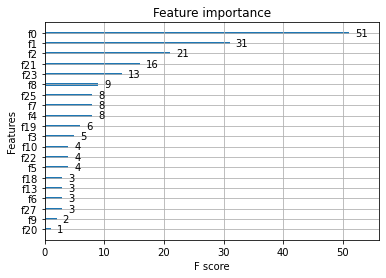

In [606]:
#Посмотрим какие фичи модель выделила больше всего
xgb.plot_importance(xgb_model, max_num_features=20)

plt.show()

In [607]:
#Создадим предсказание xgb модели
xgb_pred = xgb_model.predict(xgb_dtest)

In [608]:
#Зададим порог в 50%
xgb_pred_50_percent = (xgb_pred > 0.5).astype(int)

In [609]:
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_50_percent)

In [610]:
print('Алгоритм XGBoost (порог 50%)\n', '-'*30, '\n', f'ROC-AUC score равен {round(xgb_roc_auc, 4)} \n' )

Алгоритм XGBoost (порог 50%)
 ------------------------------ 
 ROC-AUC score равен 0.7476 



Вручную подгоним

In [611]:
xgb_best_parametrs = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

#Создадим веса для экземпляров класса
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 1.2

#Ещё раз создадим объекты DMatrix для работы с xgboost (укажим наши веса weights)
xgb_dtrain1 = xgb.DMatrix(np.array(x_train), np.array(y_train), weight=weights)
xgb_dtest1 = xgb.DMatrix(np.array(x_test), np.array(y_test))

#Создадим модель xgboost
xgb_model1 = xgb.train(xgb_best_parametrs, xgb_dtrain1, num_rounds)

#Создадим предсказание xgb модели
xgb_pred1 = xgb_model1.predict(xgb_dtest1)

#Зададим порог в 40%
xgb_pred_40_percent1 = (xgb_pred1 > 0.50).astype(int)

xgb_roc_auc_40_weights = roc_auc_score(y_test, xgb_pred_40_percent1)

print('Алгоритм XGBoost (порог 40%)\n', 'Добавлены веса для экземпляров класса \n', '-'*35, '\n', f'ROC-AUC score равен {round(xgb_roc_auc_40_weights, 4)} \n \n' )

Алгоритм XGBoost (порог 40%)
 Добавлены веса для экземпляров класса 
 ----------------------------------- 
 ROC-AUC score равен 0.7504 
 



##RandomForest

In [612]:
from sklearn.ensemble import RandomForestClassifier

In [613]:
rfc_best_parametrs = {'criterion': 'entropy', 
                      'max_depth': 10, 
                      'max_features': 'sqrt', 
                      'n_estimators': 100}

In [614]:
class_weights = {0: 1, 1: 1.2}

In [615]:
rfc = RandomForestClassifier(**rfc_best_parametrs, random_state=random_state, class_weight=class_weights)

rfc_model = rfc.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)
rfc_pred_prob = rfc_model.predict_proba(x_test)[:, 1]

rfc_roc_auc = roc_auc_score(y_test, rfc_pred)

In [616]:
print('Алгоритм RandomForest\n', '-'*30, '\n', f'ROC-AUC score равен {round(rfc_roc_auc, 4)} \n' )

Алгоритм RandomForest
 ------------------------------ 
 ROC-AUC score равен 0.754 



In [617]:
rfc_pred_prob > 0.5

array([ True,  True, False, ..., False,  True, False])

##Итог

In [618]:
ex = pd.read_csv('sample_submission.csv')
ex.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [619]:
rfc_model.predict_proba(X_test)[:, 1] >0.5

array([ True, False,  True, ...,  True, False,  True])

In [620]:
X_test['Transported'] = rfc_model.predict_proba(X_test)[:, 1] > 0.5

In [621]:
X_test[['PassengerId', 'Transported']].to_csv('submit_file.csv', index=False)
X_test[['PassengerId', 'Transported']].head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
